# 개요

1. 주제
- 한국의 부동산 데이터와 사용자가 직접 수집한 외부 데이터를 활용하여 부동산 가격 변화 및 사회와의 관련성을 분석.


2. 배경
- 자산은 다양한 형태로 존재합니다. 현금이 될 수도 있고, 주식이 될 수도 잇습니다. 그 중에서도 “부동산”이라는 자산은 우리의 경제와 정치에 많은 영향을 주었습니다. 한국의 부동산 변화를 연구하여 사회 전반에 미치는 영향을 파악한다면 다가오는 미래에 관한 통찰을 얻을 수 있지 않을까요? 주어진 데이터와 외부 데이터를 적극 활용하여 유의미한 인사이트를 발굴해 주세요!


3. 목표
- 한국 부동산 움직임이 쉽고 명확하게 보이도록 시각화
- 부동산 데이터로부터 사회 현상을 설명하는 인사이트 발굴
- 외부 데이터를 적극 활용한 인사이트 발굴
- 파이썬 및 R의 시각화 툴을 활용한 데이터 분석 학습


4. 주최 / 주관
- 주최 : DACON
- 주관 : DACON


5. 참가 대상
- AI 혹은 빅데이터에 관심 있는 누구나
- 학교, 기업, 교육 업체 등 단체에서 자유롭게 참가 가능

# 데이터 수집

## 기본 데이터 로드

In [2]:
import pandas as pd
pd.options.display.max_columns = 100
statusOfPermit = pd.read_csv('Data/건축허가현황.csv')
orderAmount = pd.read_csv('Data/국내건설수주액.csv')
unsoldStatus = pd.read_csv('Data/미분양주택현황.csv')
apartTransactionIdx = pd.read_csv('Data/아파트 실거래가격지수.csv')
monthlyPriceIdx = pd.read_csv('Data/유형별_주택월세통합가격지수.csv')
liscenseIdx = pd.read_csv('Data/주택건설인허가실적.csv')
salesPriceIdx = pd.read_csv('Data/주택매매가격지수(KB).csv')
rentPriceIdx = pd.read_csv('Data/주택전세가격지수(KB).csv')
landPriceRateOfChange = pd.read_csv('Data/지역별_지가변동률.csv')

- 컬럼명 수정

In [3]:
 def changeColumnName(df=None):
    cNames = []
    for c in df.columns:
        if c == "Unnamed: 0":
            cNames.append("년월")
        else:
            cNames.append(c)
    return cNames

statusOfPermit.columns = changeColumnName(statusOfPermit)
orderAmount.columns = changeColumnName(orderAmount)
unsoldStatus.columns = changeColumnName(unsoldStatus)
apartTransactionIdx.columns = changeColumnName(apartTransactionIdx)
monthlyPriceIdx.columns = changeColumnName(monthlyPriceIdx)
liscenseIdx.columns = changeColumnName(liscenseIdx)
salesPriceIdx.columns = changeColumnName(salesPriceIdx)
rentPriceIdx.columns = changeColumnName(rentPriceIdx)
landPriceRateOfChange.columns = changeColumnName(landPriceRateOfChange)

## 외부 데이터 수집
- 학군
- 상권
- 교통
- 관공서

# 데이터 탐색 및 시각화

## 주택매매가격지수

In [4]:
fromDate ="2019-01-01"

In [5]:
salesPriceIdx = salesPriceIdx.melt(id_vars="년월", var_name="종류", value_name="지수")

In [6]:
for i in salesPriceIdx.index:
    if i > 0 and salesPriceIdx.loc[i, "종류"] == salesPriceIdx.loc[i-1, "종류"]:
        salesPriceIdx.loc[i, "증감"] = salesPriceIdx.loc[i, "지수"] - salesPriceIdx.loc[i-1, "지수"]
    else:
        salesPriceIdx.loc[i, "증감"] = 0  

No handles with labels found to put in legend.


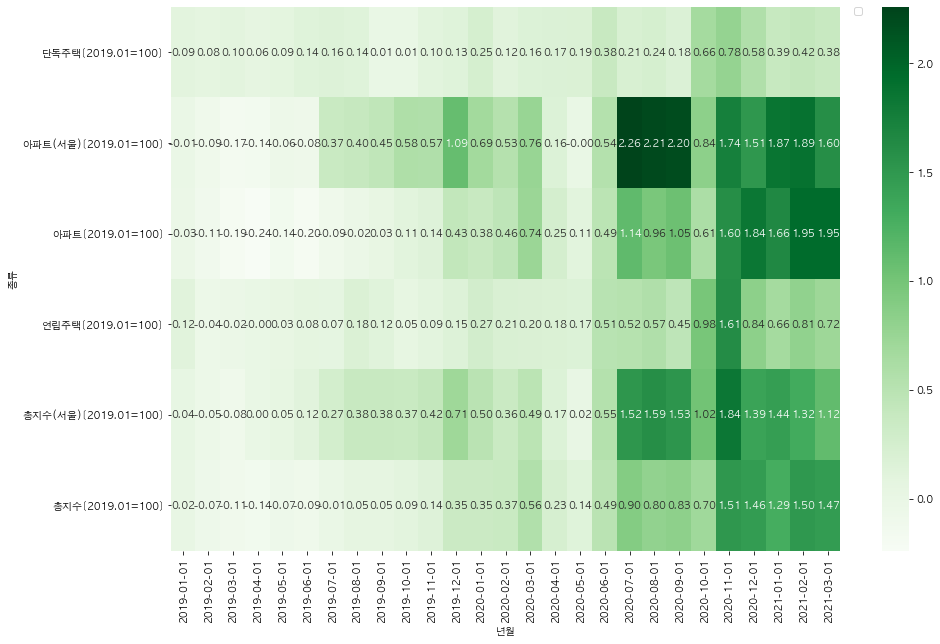

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

plt.figure(figsize=(15, 10))
sns.heatmap(salesPriceIdx[salesPriceIdx["년월"] >=fromDate].groupby(["년월", "종류"])["증감"].mean().unstack().T, cmap="Greens", annot=True, fmt=".2f")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

- '20.07부터 급상승
- 서울이 먼저 오르고 그외 지역이 따라가는 모양

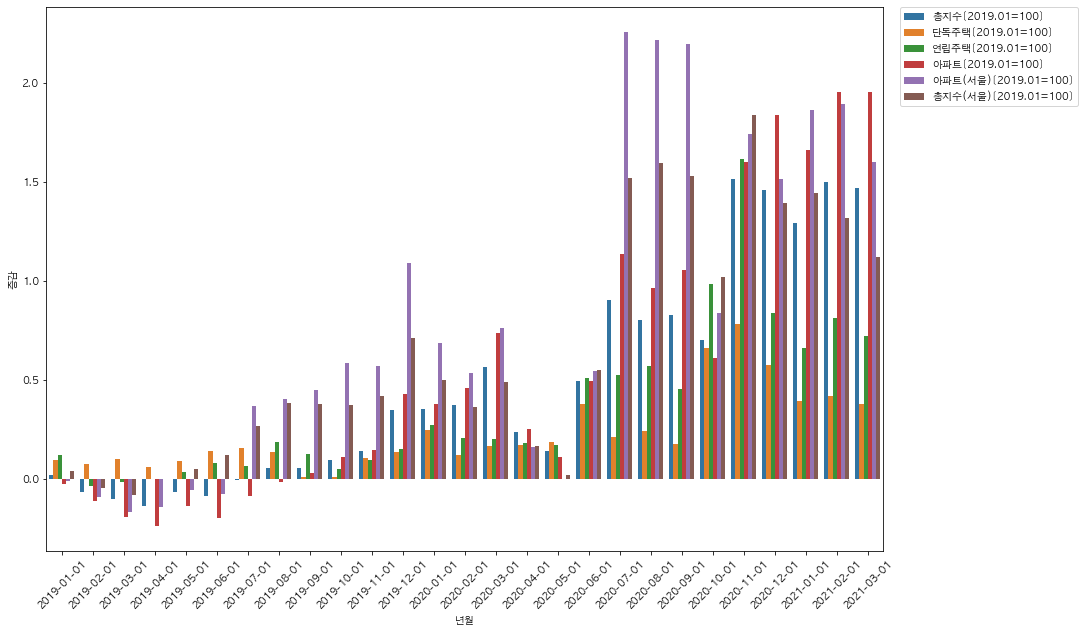

In [8]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation = 45)
sns.barplot(data=salesPriceIdx[salesPriceIdx["년월"]>"2018.01.01"], x="년월", y="증감", hue="종류")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

## 주택전세가격지수

In [9]:
rentPriceIdx

,년월,총지수[2019.01=100],단독주택[2019.01=100],연립주택[2019.01=100],아파트[2019.01=100],아파트(서울)[2019.01=100],총지수(서울)[2019.01=100]
0,1986-01-01,17.601,35.506,18.059,10.793,9.782,16.755
1,1986-02-01,17.853,35.731,18.155,11.104,10.195,17.066
2,1986-03-01,18.273,36.553,18.823,11.446,10.550,17.573
3,1986-04-01,18.651,37.151,19.158,11.695,10.787,18.002
4,1986-05-01,18.693,37.151,19.301,11.726,10.875,18.040
...,...,...,...,...,...,...,...
418,2020-11-01,104.886,102.823,105.011,105.140,110.216,109.252
419,2020-12-01,106.043,103.249,105.711,106.608,112.406,110.887
420,2021-01-01,106.925,103.545,106.306,107.688,114.116,112.229
421,2021-02-01,107.730,103.887,106.959,108.651,115.372,113.272


In [10]:
rentPriceIdx = rentPriceIdx.melt(id_vars="년월", var_name="종류", value_name="지수")

In [11]:
rentPriceIdx

,년월,종류,지수
0,1986-01-01,총지수[2019.01=100],17.601
1,1986-02-01,총지수[2019.01=100],17.853
2,1986-03-01,총지수[2019.01=100],18.273
3,1986-04-01,총지수[2019.01=100],18.651
4,1986-05-01,총지수[2019.01=100],18.693
...,...,...,...
2533,2020-11-01,총지수(서울)[2019.01=100],109.252
2534,2020-12-01,총지수(서울)[2019.01=100],110.887
2535,2021-01-01,총지수(서울)[2019.01=100],112.229
2536,2021-02-01,총지수(서울)[2019.01=100],113.272


In [12]:
for i in rentPriceIdx.index:
    if i > 0 and rentPriceIdx.loc[i, "종류"] == rentPriceIdx.loc[i-1, "종류"]:
        rentPriceIdx.loc[i, "증감"] = rentPriceIdx.loc[i, "지수"] - rentPriceIdx.loc[i-1, "지수"]
    else:
        rentPriceIdx.loc[i, "증감"] = 0  

No handles with labels found to put in legend.


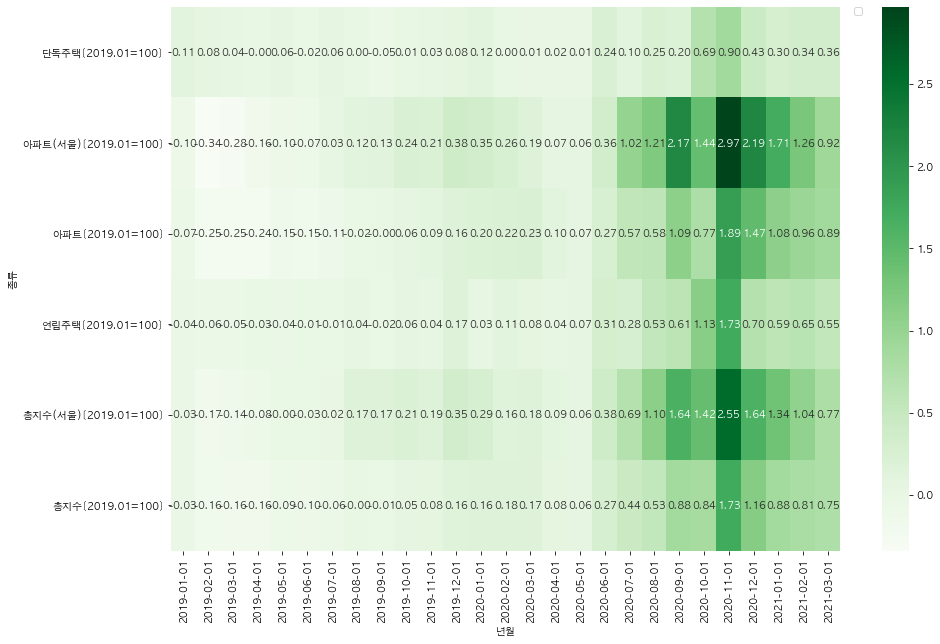

In [13]:
plt.figure(figsize=(15, 10))
sns.heatmap(rentPriceIdx[rentPriceIdx["년월"] >="2019-01-01"].groupby(["년월", "종류"])["증감"].mean().unstack().T, cmap="Greens", annot=True, fmt=".2f")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

<AxesSubplot:xlabel='년월', ylabel='지수'>

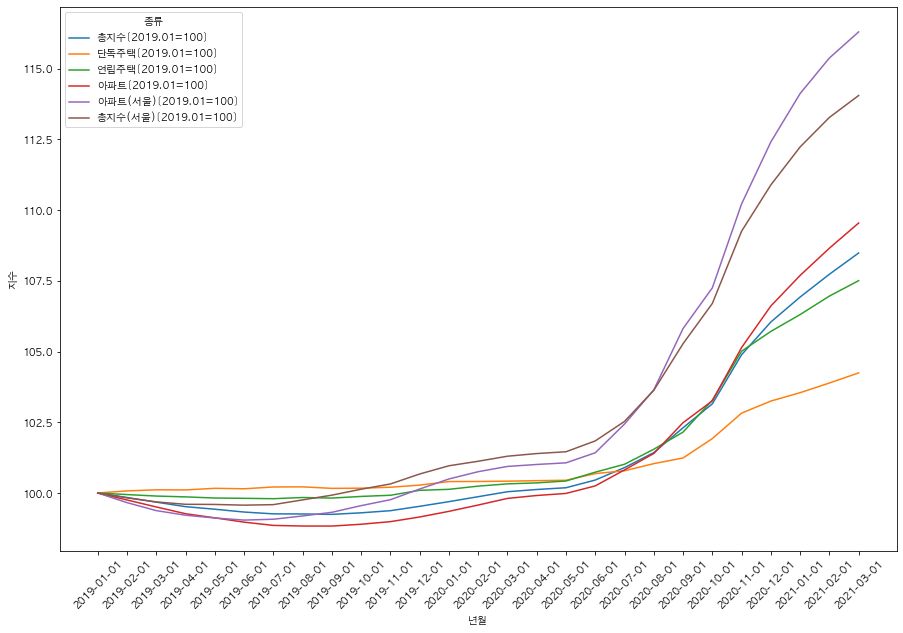

In [14]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation = 45)
sns.lineplot(data=rentPriceIdx[rentPriceIdx["년월"]>"2018.01.01"], x="년월", y="지수", hue="종류")
# sns.catplot(data=rentPriceIdx[rentPriceIdx["년월"]>=fromDate], x="년월", y="증감", col="종류", col_wrap=2, kind="bar", height=5)
# sns.barplot(data=rentPriceIdx[rentPriceIdx["년월"]>=fromDate], x="년월", y="증감", hue="종류", )
# plt.xticks(rotation = 45)
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

##  아파트 실거래가격지수

In [15]:
apartTransactionIdx.melt(id_vars="년월", var_name="지역", value_name="지수")

,년월,지역,지수
0,2006-01-01,도심권[2017.11=100],59.3
1,2006-02-01,도심권[2017.11=100],58.1
2,2006-03-01,도심권[2017.11=100],59.5
3,2006-04-01,도심권[2017.11=100],59.5
4,2006-05-01,도심권[2017.11=100],61.4
...,...,...,...
5063,2020-09-01,지방[2017.11=100],101.5
5064,2020-10-01,지방[2017.11=100],103.1
5065,2020-11-01,지방[2017.11=100],106.1
5066,2020-12-01,지방[2017.11=100],109.3


<AxesSubplot:xlabel='지역', ylabel='년월'>

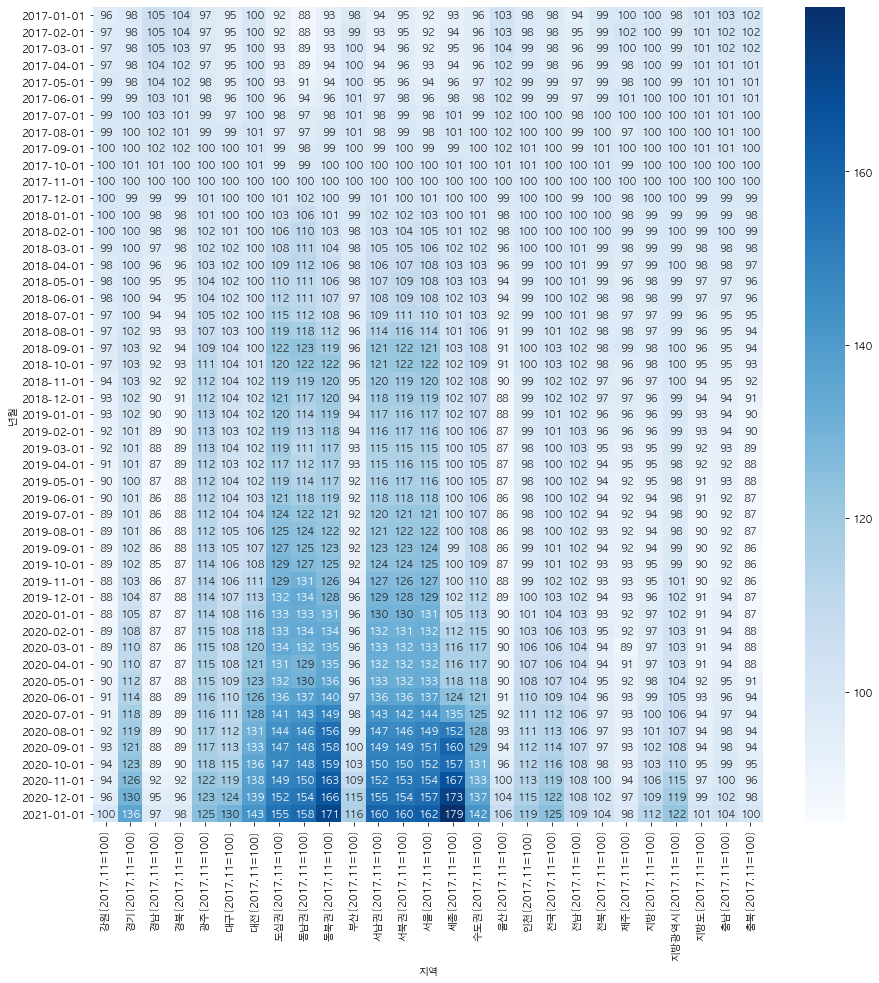

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(pd.pivot_table(apartTransactionIdx[apartTransactionIdx["년월"] >= "2017-01-01"].melt(id_vars="년월", var_name="지역", value_name="지수"),
            index="년월", columns="지역", values="지수").round(), cmap="Blues", annot=True, fmt=".0f")

- 대부분 서울과 수도권이 높고, 20년대 중반부터 세종시가 급격히 증가함

## 국내건설수주액

In [17]:
orderAmount.melt(id_vars="년월", var_name="구분(백만원)",value_name="금액")

,년월,구분(백만원),금액
0,1976-01-01,총수주액[백만원],12592.0
1,1976-02-01,총수주액[백만원],8230.0
2,1976-03-01,총수주액[백만원],22261.0
3,1976-04-01,총수주액[백만원],45920.0
4,1976-05-01,총수주액[백만원],48992.0
...,...,...,...
16255,2020-10-01,조경공사[백만원],107825.0
16256,2020-11-01,조경공사[백만원],46786.0
16257,2020-12-01,조경공사[백만원],144768.0
16258,2021-01-01,조경공사[백만원],31062.0


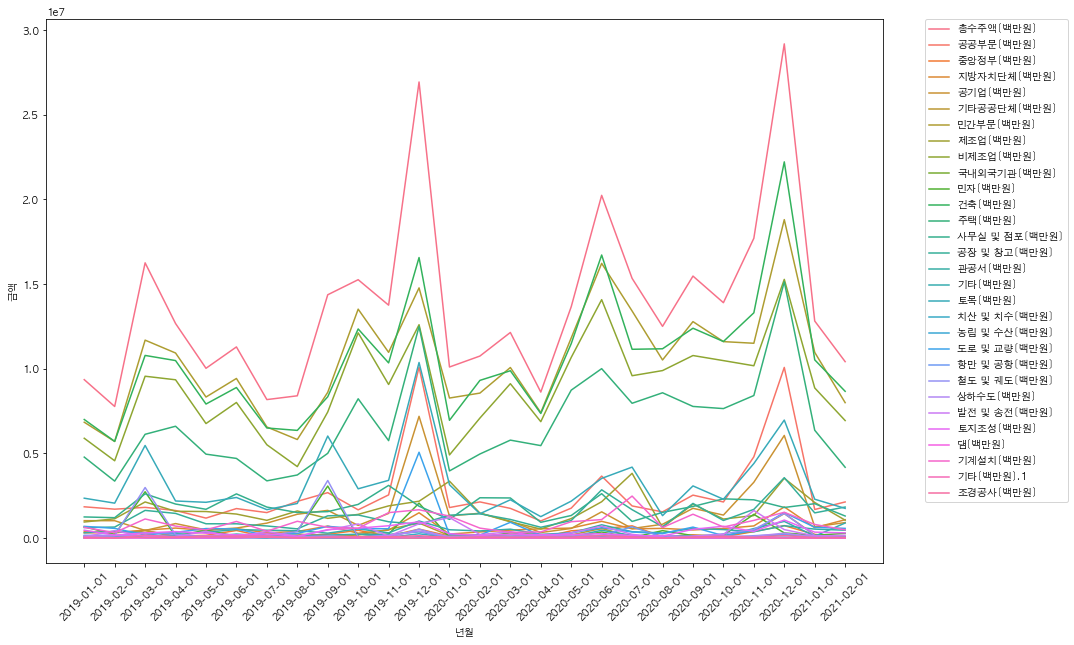

In [18]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
sns.lineplot(data=orderAmount[orderAmount["년월"] >= fromDate].melt(id_vars="년월",
                                                                  var_name="구분(백만원)",
                                                                 value_name="금액"),
           x="년월", y="금액", hue="구분(백만원)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

- 매년 12월에 급증하는 경향을 보임

## 건축허가현황

In [19]:
statusOfPermit.tail()

,년월,연면적-철근·철골조[㎡],연면적-조적조[㎡],연면적-목조[㎡],연면적-기타(자재별)[㎡],연면적-주거용[㎡],연면적-상업용[㎡],연면적-공업용[㎡],연면적-교육및사회용[㎡],연면적-기타(용도별)[㎡],연면적-자재별[㎡],연면적-용도별[㎡],동수-철근·철골조[동수],동수-조적조[동수],동수-목조[동수],동수-기타(자재별)[동수],동수-주거용[동수],동수-상업용[동수],동수-공업용[동수],동수-교육및사회용[동수],동수-기타(용도별)[동수],동수-자재별[동수],동수-용도별[동수]
242,2020-10-01,9178907.0,16487.0,85803.0,39128.0,3279774.0,2402944.0,1250233.0,459896.0,1927478.0,9320325.0,9320325.0,14513.0,344.0,908.0,315.0,6004.0,4295.0,1201.0,531.0,4049.0,16080.0,16080.0
243,2020-11-01,12299768.0,12485.0,93084.0,26523.0,3814695.0,3383591.0,1715891.0,915248.0,2602435.0,12431860.0,12431860.0,14979.0,309.0,1040.0,381.0,6010.0,4541.0,1315.0,501.0,4342.0,16709.0,16709.0
244,2020-12-01,12842483.0,12602.0,78201.0,130454.0,5071607.0,2799017.0,1556870.0,550184.0,3086062.0,13063740.0,13063740.0,13315.0,263.0,862.0,362.0,5419.0,4057.0,1188.0,583.0,3555.0,14802.0,14802.0
245,2021-01-01,7562192.0,8786.0,47444.0,22376.0,2896893.0,1875366.0,977904.0,359106.0,1531529.0,7640798.0,7640798.0,9363.0,166.0,549.0,229.0,3430.0,2835.0,805.0,434.0,2803.0,10307.0,10307.0
246,2021-02-01,10170032.0,8577.0,66864.0,36167.0,3846089.0,2199042.0,915240.0,494892.0,2826377.0,10281640.0,10281640.0,10137.0,155.0,679.0,202.0,4021.0,3184.0,911.0,287.0,2770.0,11173.0,11173.0


In [20]:
statusOfPermit[statusOfPermit["년월"] >= fromDate].melt(id_vars="년월")

,년월,variable,value
0,2019-01-01,연면적-철근·철골조[㎡],7896853.0
1,2019-02-01,연면적-철근·철골조[㎡],7374364.0
2,2019-03-01,연면적-철근·철골조[㎡],10126517.0
3,2019-04-01,연면적-철근·철골조[㎡],10816280.0
4,2019-05-01,연면적-철근·철골조[㎡],10952259.0
...,...,...,...
567,2020-10-01,동수-용도별[동수],16080.0
568,2020-11-01,동수-용도별[동수],16709.0
569,2020-12-01,동수-용도별[동수],14802.0
570,2021-01-01,동수-용도별[동수],10307.0


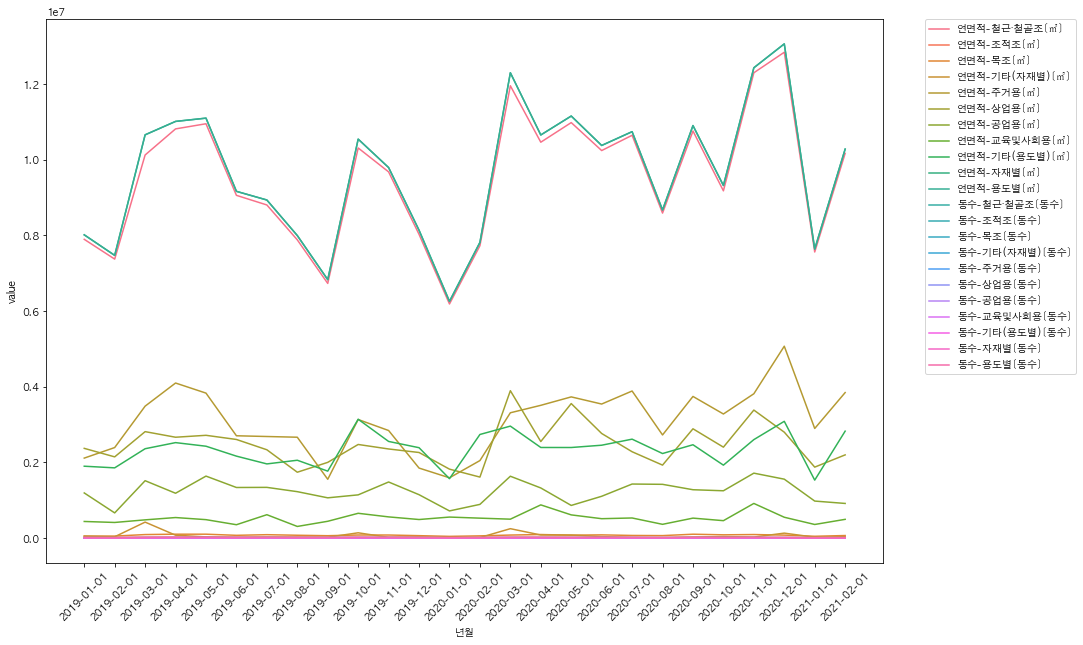

In [21]:
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
sns.lineplot(data=statusOfPermit[statusOfPermit["년월"] >= fromDate].melt(id_vars="년월"),
             x="년월", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 미분양 주택현황

In [22]:
unsoldStatus.tail()

,년월,전국[호],서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
165,2020-10-01,26703.0,52.0,1262.0,1143.0,822.0,245.0,832.0,474.0,2733.0,2884.0,307.0,3235.0,444.0,1073.0,2922.0,7042.0,1233.0,3607.0,0.0
166,2020-11-01,23620.0,52.0,1084.0,667.0,691.0,88.0,831.0,473.0,2440.0,2648.0,275.0,3582.0,400.0,1059.0,2541.0,5581.0,1208.0,3183.0,0.0
167,2020-12-01,19005.0,49.0,973.0,280.0,466.0,31.0,638.0,468.0,1616.0,3115.0,273.0,2510.0,661.0,1059.0,2154.0,3617.0,1095.0,2131.0,0.0
168,2021-01-01,17130.0,49.0,944.0,419.0,245.0,307.0,635.0,438.0,1567.0,2671.0,234.0,2061.0,251.0,1046.0,2049.0,2964.0,1250.0,1861.0,0.0
169,2021-02-01,15786.0,88.0,966.0,195.0,142.0,44.0,599.0,436.0,1367.0,2340.0,211.0,1913.0,227.0,964.0,2493.0,2580.0,1221.0,1597.0,0.0


In [23]:
unsoldStatus.columns

Index(['년월', '전국[호]', '서울[호]', '부산[호]', '대구[호]', '인천[호]', '광주[호]', '대전[호]',
       '울산[호]', '경기[호]', '강원[호]', '충북[호]', '충남[호]', '전북[호]', '전남[호]', '경북[호]',
       '경남[호]', '제주[호]', '수도권[호]', '세종[호]'],
      dtype='object')

In [24]:
filteredUnsoldStatus = unsoldStatus.drop("전국[호]", axis=1, inplace=False)
filteredUnsoldStatus

,년월,서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
0,2007-01-01,697.0,8680.0,9467.0,243.0,7005.0,819.0,1180.0,3604.0,5312.0,2548.0,7449.0,5179.0,5374.0,6210.0,11772.0,77.0,4544.0,NaN
1,2007-02-01,590.0,8653.0,9134.0,312.0,6246.0,803.0,1210.0,3361.0,5344.0,2645.0,7363.0,5098.0,5253.0,5948.0,11563.0,96.0,4263.0,NaN
2,2007-03-01,687.0,8548.0,9189.0,266.0,5905.0,1048.0,1687.0,2579.0,5801.0,2565.0,7446.0,5184.0,4887.0,5854.0,11328.0,188.0,3532.0,NaN
3,2007-04-01,685.0,8074.0,9009.0,219.0,5829.0,1020.0,1521.0,2488.0,5460.0,3632.0,8250.0,4812.0,4664.0,5419.0,12149.0,162.0,3392.0,NaN
4,2007-05-01,704.0,7964.0,10888.0,362.0,7842.0,957.0,1500.0,2488.0,5212.0,4012.0,9195.0,4625.0,4640.0,6303.0,11723.0,156.0,3554.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2020-10-01,52.0,1262.0,1143.0,822.0,245.0,832.0,474.0,2733.0,2884.0,307.0,3235.0,444.0,1073.0,2922.0,7042.0,1233.0,3607.0,0.0
166,2020-11-01,52.0,1084.0,667.0,691.0,88.0,831.0,473.0,2440.0,2648.0,275.0,3582.0,400.0,1059.0,2541.0,5581.0,1208.0,3183.0,0.0
167,2020-12-01,49.0,973.0,280.0,466.0,31.0,638.0,468.0,1616.0,3115.0,273.0,2510.0,661.0,1059.0,2154.0,3617.0,1095.0,2131.0,0.0
168,2021-01-01,49.0,944.0,419.0,245.0,307.0,635.0,438.0,1567.0,2671.0,234.0,2061.0,251.0,1046.0,2049.0,2964.0,1250.0,1861.0,0.0


In [25]:
filteredUnsoldStatus.melt(id_vars="년월", var_name="지역", value_name="현황").groupby(["년월", "지역"])["현황"].mean().unstack().T

년월,2007-01-01,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,2007-11-01,2007-12-01,2008-01-01,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,2008-12-01,2009-01-01,2009-02-01,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01,2010-01-01,2010-02-01,2010-03-01,2010-04-01,2010-05-01,2010-06-01,2010-07-01,2010-08-01,2010-09-01,2010-10-01,2010-11-01,2010-12-01,2011-01-01,2011-02-01,...,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01,2020-03-01,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01
지역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강원[호],5312.0,5344.0,5801.0,5460.0,5212.0,6642.0,6850.0,6625.0,6558.0,6673.0,6739.0,7114.0,6861.0,6583.0,6239.0,6264.0,6217.0,11246.0,10769.0,10377.0,10125.0,9383.0,10930.0,10581.0,10072.0,9940.0,9780.0,9746.0,9249.0,8987.0,8788.0,8577.0,7817.0,7530.0,7353.0,7157.0,5691.0,5416.0,5274.0,5108.0,5105.0,5009.0,4741.0,4556.0,4413.0,4163.0,3988.0,3837.0,3720.0,3544.0,...,3466.0,3281.0,3064.0,3297.0,3013.0,3019.0,2655.0,2316.0,3094.0,2701.0,2474.0,2816.0,2693.0,4636.0,5215.0,5038.0,4883.0,4729.0,4906.0,5240.0,5112.0,5350.0,5300.0,5736.0,5589.0,5802.0,5748.0,7882.0,7776.0,7712.0,7474.0,8097.0,7797.0,7382.0,7120.0,5945.0,4964.0,4168.0,3902.0,3742.0,3470.0,3202.0,3015.0,2816.0,3060.0,2884.0,2648.0,3115.0,2671.0,2340.0
경기[호],3604.0,3361.0,2579.0,2488.0,2488.0,3899.0,3883.0,4452.0,7906.0,8573.0,9453.0,13643.0,20691.0,21178.0,20685.0,18104.0,17661.0,16733.0,20514.0,19922.0,22455.0,22360.0,22111.0,22795.0,21415.0,20405.0,24040.0,24704.0,23192.0,21699.0,20248.0,19738.0,17534.0,16638.0,16473.0,19325.0,20432.0,22467.0,21408.0,21386.0,22349.0,21969.0,21866.0,22326.0,23185.0,22701.0,22247.0,22418.0,22153.0,21028.0,...,15092.0,14492.0,14465.0,13309.0,11958.0,11229.0,9560.0,7596.0,7945.0,7912.0,8375.0,8793.0,8611.0,8676.0,7422.0,9003.0,8600.0,8134.0,7530.0,7287.0,6487.0,5529.0,5078.0,4968.0,6769.0,5878.0,7311.0,7048.0,6562.0,7853.0,7821.0,8569.0,8413.0,6976.0,7300.0,5085.0,3735.0,3634.0,3662.0,3224.0,2604.0,2445.0,2793.0,2585.0,3338.0,2733.0,2440.0,1616.0,1567.0,1367.0
경남[호],11772.0,11563.0,11328.0,12149.0,11723.0,12072.0,12414.0,12576.0,12811.0,12694.0,13884.0,14857.0,14602.0,14400.0,13872.0,13549.0,13648.0,17380.0,17832.0,17214.0,17000.0,17140.0,16877.0,17107.0,16311.0,16043.0,14460.0,14479.0,12124.0,11988.0,11430.0,10948.0,10340.0,9427.0,8818.0,8698.0,8187.0,7474.0,7231.0,6815.0,6570.0,6282.0,6005.0,5950.0,6435.0,5791.0,5754.0,4780.0,4586.0,4257.0,...,7785.0,11117.0,10712.0,9341.0,9040.0,9166.0,9707.0,10354.0,11147.0,11257.0,12122.0,12088.0,13227.0,12914.0,13149.0,13724.0,14955.0,14896.0,15095.0,14912.0,14847.0,14673.0,14213.0,14147.0,14060.0,14781.0,14824.0,13476.0,13800.0,14402.0,14250.0,14078.0,13903.0,13489.0,13060.0,12269.0,11586.0,11099.0,10827.0,10590.0,9971.0,8542.0,8840.0,8841.0,8163.0,7042.0,5581.0,3617.0,2964.0,2580.0
경북[호],6210.0,5948.0,5854.0,5419.0,6303.0,7665.0,8541.0,8389.0,8683.0,8676.0,8523.0,8662.0,10516.0,10591.0,10844.0,11858.0,11124.0,13813.0,15177.0,15464.0,15483.0,15153.0,15054.0,16106.0,16189.0,15468.0,15985.0,14871.0,14929.0,14233.0,13943.0,13582.0,13311.0,12678.0,12525.0,12808.0,12915.0,12324.0,12100.0,11897.0,12195.0,11253.0,10627.0,10664.0,9830.0,9512.0,8777.0,8042.0,7693.0,7278.0,...,8032.0,7785.0,7538.0,7472.0,7774.0,7514.0,7826.0,8269.0,8077.0,8065.0,7794.0,7630.0,7806.0,8237.0,7820.0,7649.0,7455.0,8419.0,8198.0,8033.0,8760.0,

No handles with labels found to put in legend.


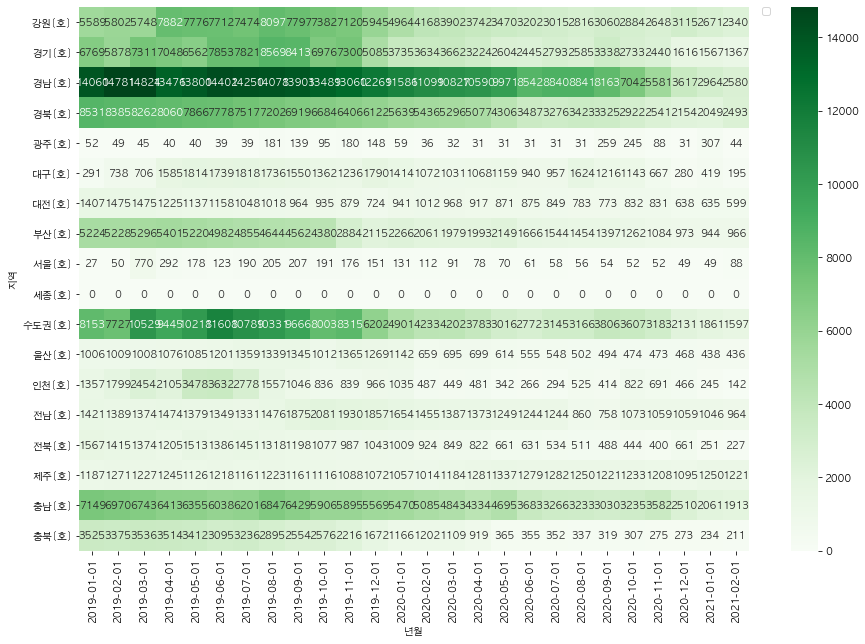

In [26]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=filteredUnsoldStatus[(filteredUnsoldStatus["년월"] >=fromDate)].melt(id_vars="년월", var_name="지역", value_name="현황").groupby(["년월", "지역"])["현황"].mean().unstack().T, cmap="Greens", annot=True, fmt=".0f")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

- 경상도가 상대적으로 미분양주택수가 많음
- 서울은 상대적으로 미반양 주택이 적음

## 유형별_주택월세통합가격지수

In [27]:
monthlyPriceIdx.tail()

,년월,종합-전국[2017.11=100],종합-수도권[2017.11=100],종합-지방[2017.11=100],종합-5대광역시[2017.11=100],종합-8개도[2017.11=100],종합-서울[2017.11=100],종합-경기[2017.11=100],종합-인천[2017.11=100],종합-부산[2017.11=100],종합-대구[2017.11=100],종합-광주[2017.11=100],종합-대전[2017.11=100],종합-울산[2017.11=100],종합-세종[2017.11=100],종합-강원[2017.11=100],종합-충북[2017.11=100],종합-충남[2017.11=100],종합-전북[2017.11=100],종합-전남[2017.11=100],종합-경북[2017.11=100],종합-경남[2017.11=100],종합-제주[2017.11=100],종합-6대광역시[2017.11=100],종합-9개도[2017.11=100],아파트-전국[2017.11=100],아파트-수도권[2017.11=100],아파트-지방[2017.11=100],아파트-5대광역시[2017.11=100],아파트-8개도[2017.11=100],아파트-서울[2017.11=100],아파트-경기[2017.11=100],아파트-인천[2017.11=100],아파트-부산[2017.11=100],아파트-대구[2017.11=100],아파트-광주[2017.11=100],아파트-대전[2017.11=100],아파트-울산[2017.11=100],아파트-세종[2017.11=100],아파트-강원[2017.11=100],아파트-충북[2017.11=100],아파트-충남[2017.11=100],아파트-전북[2017.11=100],아파트-전남[2017.11=100],아파트-경북[2017.11=100],아파트-경남[2017.11=100],아파트-제주[2017.11=100],아파트-6대광역시[2017.11=100],아파트-9개도[2017.11=100],연립다세대-전국[2017.11=100],연립다세대-수도권[2017.11=100],연립다세대-지방[2017.11=100],연립다세대-5대광역시[2017.11=100],연립다세대-8개도[2017.11=100],연립다세대-서울[2017.11=100],연립다세대-경기[2017.11=100],연립다세대-인천[2017.11=100],연립다세대-부산[2017.11=100],연립다세대-대구[2017.11=100],연립다세대-광주[2017.11=100],연립다세대-대전[2017.11=100],연립다세대-울산[2017.11=100],연립다세대-세종[2017.11=100],연립다세대-강원[2017.11=100],연립다세대-충북[2017.11=100],연립다세대-충남[2017.11=100],연립다세대-전북[2017.11=100],연립다세대-전남[2017.11=100],연립다세대-경북[2017.11=100],연립다세대-경남[2017.11=100],연립다세대-제주[2017.11=100],연립다세대-6대광역시[2017.11=100],연립다세대-9개도[2017.11=100],단독주택-전국[2017.11=100],단독주택-수도권[2017.11=100],단독주택-지방[2017.11=100],단독주택-5대광역시[2017.11=100],단독주택-8개도[2017.11=100],단독주택-서울[2017.11=100],단독주택-경기[2017.11=100],단독주택-인천[2017.11=100],단독주택-부산[2017.11=100],단독주택-대구[2017.11=100],단독주택-광주[2017.11=100],단독주택-대전[2017.11=100],단독주택-울산[2017.11=100],단독주택-세종[2017.11=100],단독주택-강원[2017.11=100],단독주택-충북[2017.11=100],단독주택-충남[2017.11=100],단독주택-전북[2017.11=100],단독주택-전남[2017.11=100],단독주택-경북[2017.11=100],단독주택-경남[2017.11=100],단독주택-제주[2017.11=100],단독주택-6대광역시[2017.11=100],단독주택-9개도[2017.11=100]
65,2020-11-01,98.8,99.9,97.8,98.8,96.9,100.3,99.6,99.9,98.3,101.0,100.0,101.5,NaN,109.3,97.3,97.2,98.3,99.0,100.6,97.0,93.0,95.4,99.0,98.1,98.5,100.0,97.2,98.8,95.4,100.6,99.6,100.0,98.2,101.4,99.9,102.1,90.7,111.5,95.8,96.7,98.0,98.2,101.1,94.8,90.4,93.7,99.1,97.5,98.9,99.7,96.8,97.6,96.1,100.0,99.3,99.7,97.8,100.0,99.7,100.2,88.3,98.7,96.9,97.0,96.5,99.4,99.9,96.4,91.8,95.5,98.5,98.2,99.3,99.9,99.1,99.1,99.1,100.0,99.9,99.4,99.1,100.1,100.2,100.0,94.4,100.2,99.4,98.0,99.2,100.1,100.3,99.8,97.2,96.4,99.1,99.2
66,2020-12-01,99.1,100.2,98.1,99.3,97.1,100.5,99.9,100.1,98.6,101.4,100.3,102.3,NaN,113.7,97.6,97.4,98.6,99.1,100.8,97.1,93.3,95.5,99.5,98.3,99.0,100.4,97.8,99.6,95.7,100.9,100.0,100.5,98.7,102.1,100.3,103.3,92.3,117.1,96.3,96.9,98.6,98.3,101.4,95.0,90.9,93.8,99.8,97.8,98.9,99.8,96.8,97.7,96.0,100.1,99.4,99.7,97.8,100.1,99.8,100.4,88.3,98.3,96.9,97.0,96.6,99.4,100.0,96.3,91.8,95.5,98.5,98.2,99.3,99.9,99.1,99.1,99.1,100.1,100.0,99.4,99.1,100.1,100.3,100.0,94.3,100.3,99.5,98.0,99.2,100.2,100.3,99.9,97.2,96.4,99.1,99.2
67,2021-01-01,99.4,100.4,98.4,99.6,97.3,100.7,100.1,100.5,98.8,101.7,100.4,103.1,NaN,116.6,97.9,97.5,98.9,99.1,100.9,97.3,93.5,95.5,99.8,98.5,99.4,100.7,98.2,100.1,96.1,101.2,100.3,101.0,98.9,102.5,100.4,104.3,93.2,120.8,96.8,97.2,99.0,98.3,101.6,95.3,91.2,93.8,100.3,98.1,99.0,99.8,96.9,97.7,96.1,100.2,99.5,99.9,97.8,100.2,99.9,100.5,88.4,98.3,97.0,97.0,96.7,99.4,100.0,96.3,91.8,95.5,98.6,98.3,99.3,100.0,99.1,99.1,99.1,100.1,100.0,99.4,99.1,100.1,100.3,100.1,94.3,100.4,99.5,98.0,99.2,100.2,100.3,99.9,97.2,96.4,99.1,99.2
68,2021-02-01,99.5,100.6,98.6,99.9,97.4,100.8,100.4,100.8,98.9,102.0,100.5,103.6,NaN,117.8,98.1,97.6,99.1,99.1,101.0,97.4,93.6,95.5,100.1,98.7,99.7,101.0,98.5,100.4,96.2,101.4,100.7,101.4,99.2,102.9,100.6,105.0,93.7,122.3,97.2,97.3,99.4,98.4,101.7,95.5,91.3,94.1,100.6,98.4,99.0,99.9,96.9,97.8,96.1,100.2,99.5,100.0,97.8,100.2,99.9,100.7,88.4,98.4,97.0,97.0,96.7,99.4,100.0,96.3,91.8,95.4,98.7,98.3,99.3,100.0,99.1,99.1,99.1,100

In [28]:
monthlyPriceIdx_melt = monthlyPriceIdx.melt(id_vars=["년월"], var_name="지역", value_name="지수")

No handles with labels found to put in legend.


NameError: name 'g' is not defined

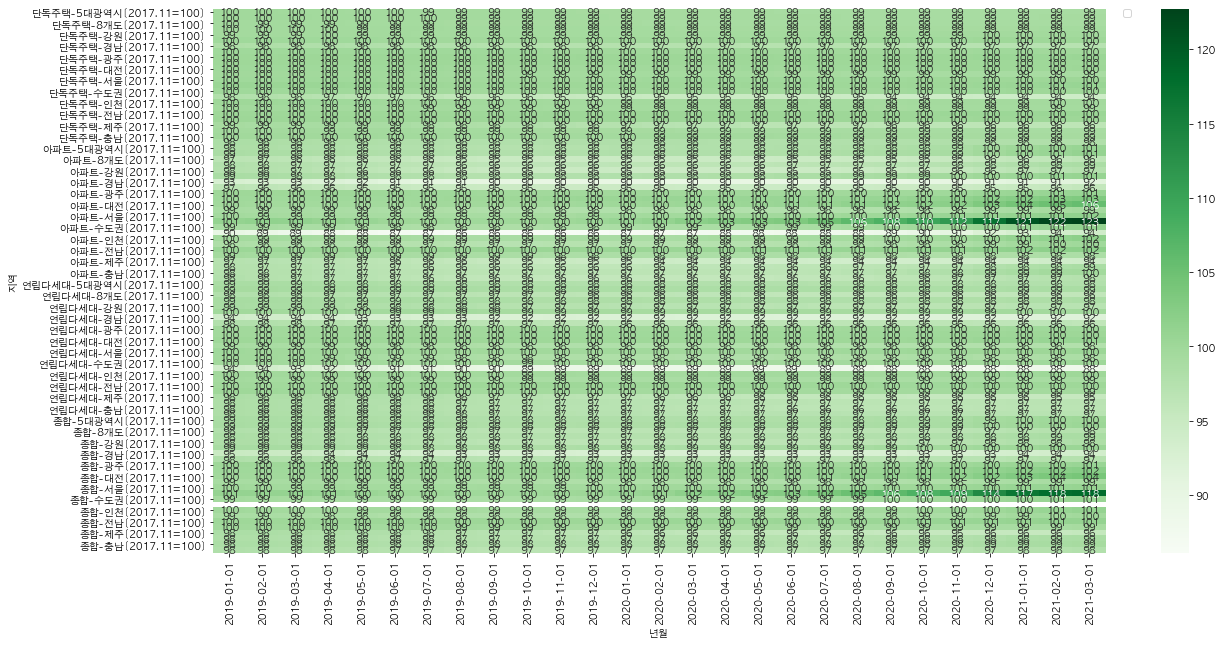

In [29]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=monthlyPriceIdx[(monthlyPriceIdx["년월"] >=fromDate)].melt(id_vars="년월", var_name="지역", value_name="현황").groupby(["년월", "지역"])["현황"].mean().unstack().T, cmap="Greens", annot=True, fmt=".0f")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xticklabels(rotation=30)

In [ ]:
monthlyPriceIdx_melt["지역"] = monthlyPriceIdx_melt["지역"].apply(lambda x: x[0 : x.find("[")], list(monthlyPriceIdx_melt["지역"]))
monthlyPriceIdx_melt

In [ ]:
monthlyPriceIdx_melt["구분"] = monthlyPriceIdx_melt["지역"].apply(lambda x:x[0: x.find('-')], list(monthlyPriceIdx_melt["지역"]))
monthlyPriceIdx_melt

In [ ]:
monthlyPriceIdx_melt["지역"] = monthlyPriceIdx_melt["지역"].apply(lambda x:x[x.find('-')+1 : ], list(monthlyPriceIdx_melt["지역"]))

In [ ]:
monthlyPriceIdx_melt = monthlyPriceIdx_melt[['년월', '구분', '지역', '지수']]
monthlyPriceIdx_melt

In [ ]:
monthlyPriceIdx_melt["구분"].unique()

In [ ]:
monthlyPriceIdx_melt["지역"].unique()

In [ ]:
monthlyPriceIdx_melt[monthlyPriceIdx_melt["구분"] == "종합"]["지역"].unique()

In [ ]:
g = sns.catplot(data=monthlyPriceIdx_melt[(monthlyPriceIdx_melt["년월"] >=fromDate) 
                                        & (monthlyPriceIdx_melt["지역"].isin(['서울', '경기', '인천', '부산', '대구',
                                           '광주', '대전', '울산', '세종', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']))],
                x="년월", y="지수", hue="지역", col="구분", col_wrap=2, height=10, kind='point')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(loc=2)
g.set_xticklabels(rotation=45)

- 2019년 말부터 아파트 월세의 급등으로 종합 지수 급등
- 연립과 단독주택은 하락 또는 보합

## 주택건설인허가실적

In [31]:
liscenseIdx.tail()

,년월,전국[호],부산[호],충북[호],충남[호],대구[호],대전[호],강원[호],광주[호],경기[호],인천[호],제주[호],전북[호],전남[호],경북[호],경남[호],민간부문[호],공공부문[호],부문별[호],세종[호],서울[호],울산[호]
165,2020-10-01,326237.0,12436.0,8367.0,19151.0,22526.0,13211.0,9854.0,10123.0,108095.0,17916.0,3670.0,10359.0,14798.0,7400.0,13881.0,310225.0,16012.0,326237.0,2381.0,45625.0,6444.0
166,2020-11-01,360711.0,13157.0,9068.0,21628.0,22797.0,16600.0,10592.0,10307.0,119766.0,21341.0,4037.0,11639.0,15979.0,7945.0,16430.0,339738.0,20973.0,360711.0,2451.0,50457.0,6517.0
167,2020-12-01,457514.0,19145.0,11729.0,24460.0,28063.0,16951.0,12438.0,10512.0,165375.0,28745.0,5017.0,13153.0,17444.0,12230.0,23206.0,375713.0,81801.0,457514.0,3551.0,58181.0,7314.0
168,2021-01-01,26183.0,2256.0,3138.0,1279.0,308.0,884.0,393.0,57.0,8141.0,1327.0,152.0,1815.0,405.0,273.0,845.0,24762.0,1421.0,26183.0,15.0,2695.0,2200.0
169,2021-02-01,59830.0,3193.0,4038.0,2891.0,1743.0,3446.0,768.0,495.0,19110.0,2029.0,333.0,2254.0,2980.0,1606.0,3056.0,53928.0,5902.0,59830.0,38.0,9599.0,2251.0


No handles with labels found to put in legend.


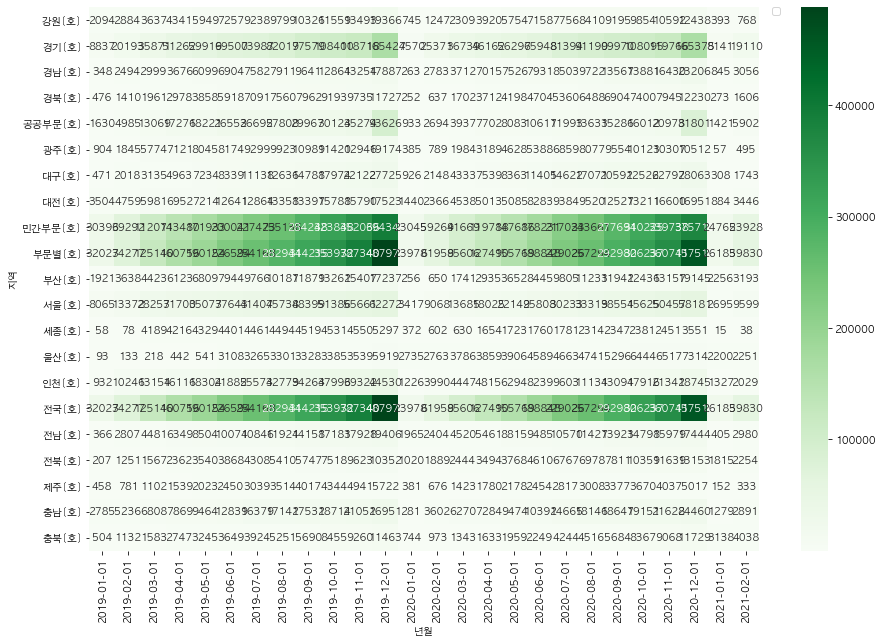

In [32]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=liscenseIdx[(liscenseIdx["년월"] >=fromDate)].melt(id_vars="년월", var_name="지역", value_name="현황").groupby(["년월", "지역"])["현황"].mean().unstack().T, cmap="Greens", annot=True, fmt=".0f")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

## 지역별 지가 변동률

In [33]:
landPriceRateOfChange.tail()

,년월,전국[%],서울[%],부산[%],대구[%],인천[%],광주[%],대전[%],울산[%],세종[%],경기[%],강원[%],충북[%],충남[%],전북[%],전남[%],경북[%],경남[%],제주[%]
189,2020-10-01,0.294,0.375,0.337,0.265,0.295,0.277,0.375,0.138,1.077,0.307,0.194,0.244,0.206,0.190,0.255,0.189,0.048,-0.088
190,2020-11-01,0.322,0.405,0.458,0.326,0.287,0.370,0.416,0.161,1.378,0.310,0.209,0.269,0.206,0.214,0.293,0.186,0.087,-0.068
191,2020-12-01,0.343,0.437,0.444,0.387,0.295,0.389,0.417,0.180,1.103,0.327,0.243,0.280,0.232,0.219,0.312,0.200,0.132,-0.004
192,2021-01-01,0.311,0.408,0.281,0.342,0.297,0.305,0.386,0.184,0.818,0.308,0.219,0.247,0.205,0.196,0.295,0.183,0.121,-0.012
193,2021-02-01,0.311,0.418,0.289,0.321,0.284,0.235,0.363,0.177,0.655,0.313,0.213,0.240,0.205,0.206,0.285,0.186,0.110,-0.010


In [34]:
landPriceRateOfChange_melt = landPriceRateOfChange.melt(id_vars="년월", var_name="지역", value_name="지가")
landPriceRateOfChange_melt

,년월,지역,지가
0,2005-01-01,전국[%],0.226
1,2005-02-01,전국[%],0.184
2,2005-03-01,전국[%],0.348
3,2005-04-01,전국[%],0.525
4,2005-05-01,전국[%],0.562
...,...,...,...
3487,2020-10-01,제주[%],-0.088
3488,2020-11-01,제주[%],-0.068
3489,2020-12-01,제주[%],-0.004
3490,2021-01-01,제주[%],-0.012


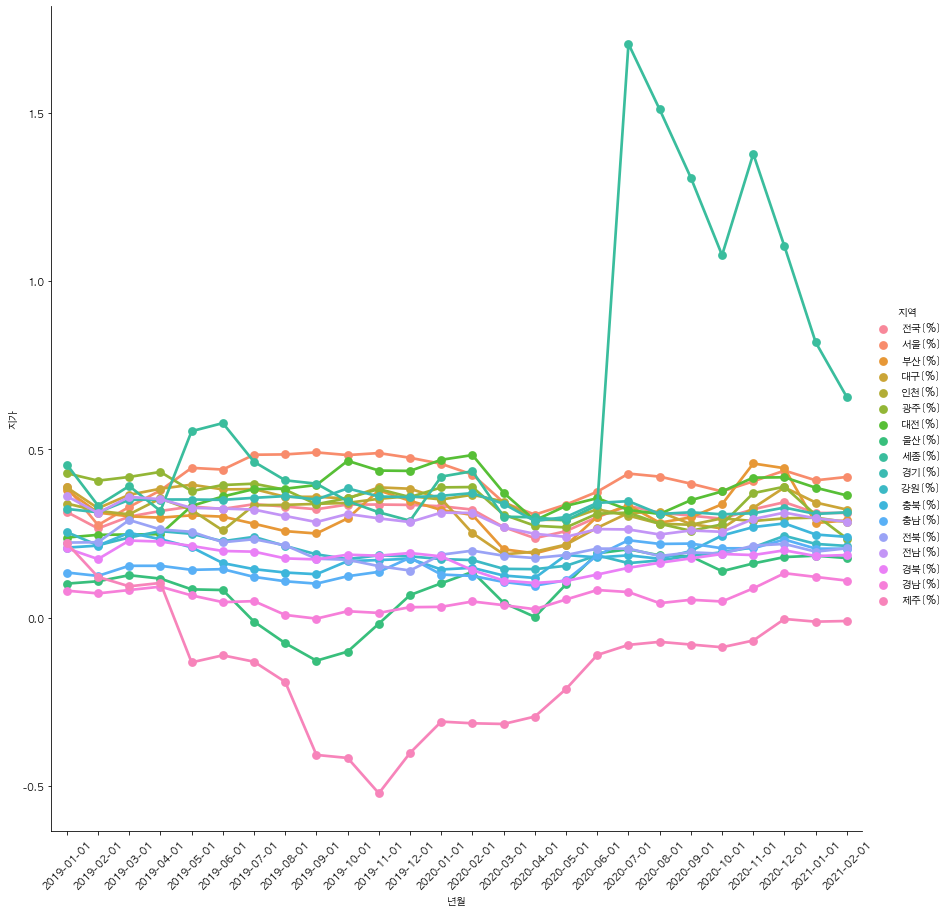

In [38]:
g = sns.catplot(data=landPriceRateOfChange_melt[landPriceRateOfChange_melt["년월"] >= fromDate],
            x="년월", y="지가", hue="지역", height=12, kind="point")
# plt.legend(loc=2, borderaxespad=0.)
g.set_xticklabels(rotation=45)

- 2020년 5월 세종시 지가 급등
- 제주도 지가는 하락폭증가, 2019년 말부터 하락폭 감소

# 가설 설정 및 검증

# 결론